## Load the Dataset

In [1]:
from datasets import load_dataset

ds = load_dataset("snoop2head/enron_aeslc_emails")

/home/ubuntu/anaconda3/envs/llms/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 535703
    })
})

In [3]:
import random
for _ in range(5):
    print(ds['train'][random.randint(0, len(ds['train']))])



{'text': 'Date: Fri, 8 Jun 2001 11:23:00 -0700 (PDT)\nFrom: susan.mara@enron.com\nTo: alan.comnes@enron.com, angela.schwarz@enron.com, beverly.aden@enron.com, \n\tbill.votaw@enron.com, brenda.barreda@enron.com, \n\tcarol.moffett@enron.com, cathy.corbin@enron.com, \n\tchris.foster@enron.com, christina.liscano@enron.com, \n\tchristopher.calger@enron.com, craig.sutter@enron.com, \n\tdan.leff@enron.com, debora.whitehead@enron.com, \n\tdennis.benevides@enron.com, don.black@enron.com, \n\tdouglas.huth@enron.com, edward.sacks@enron.com, \n\teric.melvin@enron.com, erika.dupre@enron.com, evan.hughes@enron.com, \n\tfran.deltoro@enron.com, gayle.muench@enron.com, \n\tginger.dernehl@enron.com, gordon.savage@enron.com, \n\tharold.buchanan@enron.com, harry.kingerski@enron.com, \n\tjames.steffes@enron.com, james.lewis@enron.com, \n\tjames.wright@enron.com, jeff.messina@enron.com, \n\tjeremy.blachman@enron.com, jess.hewitt@enron.com, \n\tjoe.hartsoe@enron.com, karen.denne@enron.com, kathy.bass@enron.c

In [76]:
for item in ds['train']:
    if "Re" in item['text']:
        print(item)
        break

{'text': "Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nBody: \nTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time."}


## Convert to DF for easier processing

In [4]:
import pandas as pd

In [5]:
train_df = pd.DataFrame(ds['train'])

In [6]:
train_df.sample(5, random_state=42)

,text
100004,"Date: Fri, 10 Dec 1999 08:33:00 -0800 (PST)\nF..."
11537,"Date: Fri, 18 Aug 2000 05:03:00 -0700 (PDT)\nF..."
235435,"Date: Tue, 16 Jan 2001 03:44:00 -0800 (PST)\nF..."
43057,"Date: Mon, 31 Jul 2000 09:53:00 -0700 (PDT)\nF..."
240267,"Date: Wed, 13 Dec 2000 07:04:00 -0800 (PST)\nF..."


In [7]:
train_df["text"][1000]

'Date: Thu, 15 Mar 2001 07:39:00 -0800 (PST)\nFrom: phillip.allen@enron.com\nTo: stagecoachmama@hotmail.com\nSubject: \nBody: \nLucy,\nHere is the rentroll.\nMy only questions are about #18, #25, and #37 missed rent.  Any special \nreasons?\nIt looks like there are five vacancies #2,12,20a,35,40.  If you want to run \nan ad in the paper with a $50 discount that is fine.\nI will write you a letter of recommendation.  When do you need it?  You can \nuse me as a reference.  In the next two weeks we should really have a good \nidea whether the sale is going through.\nPhillip'

In [8]:
train_df.columns

Index(['text'], dtype='object')

In [9]:
import re
from collections import defaultdict

key_pattern = re.compile(r"\b([a-zA-Z]+):")

def extract_keys(text):
    return key_pattern.findall(text)

def extract_keys_ending_with_colon(text):
    return [word for word in text.split() if word.endswith(":")]

unique_keys = defaultdict(int)

train_df['text'].apply(lambda text: [unique_keys[key] for key in extract_keys_ending_with_colon(text)])

unique_key_list = list(unique_keys.keys())
print(unique_key_list[:6])

['Date:', 'From:', 'To:', 'Subject:', 'Body:', 'Re:']


In [10]:
def parse_email(email):
    email_dict = {}
    
    date_match = re.search(r"Date:\s*(.*)", email)
    from_match = re.search(r"From:\s*(.*)", email)
    to_match = re.search(r"To:\s*(.*)", email)
    subject_match = re.search(r"Subject:\s*(.*)", email)
    body_match = re.search(r"Body:\s*(.*)", email, re.DOTALL)
    
    email_dict['Date'] = date_match.group(1).strip() if date_match else ''
    email_dict['From'] = from_match.group(1).strip() if from_match else ''
    email_dict['To'] = to_match.group(1).strip() if to_match else ''
    email_dict['Subject'] = subject_match.group(1).strip() if subject_match else ''
    email_dict['Body'] = body_match.group(1).strip() if body_match else ''
    if email_dict['Subject'] in ['Body:', 'Re:']:
        email_dict['Subject'] = ''
        
    
    return email_dict

In [11]:
email = train_df["text"][1000]
parsed_email = parse_email(email)
parsed_email

{'Date': 'Thu, 15 Mar 2001 07:39:00 -0800 (PST)',
 'From': 'phillip.allen@enron.com',
 'To': 'stagecoachmama@hotmail.com',
 'Subject': '',
 'Body': 'Lucy,\nHere is the rentroll.\nMy only questions are about #18, #25, and #37 missed rent.  Any special \nreasons?\nIt looks like there are five vacancies #2,12,20a,35,40.  If you want to run \nan ad in the paper with a $50 discount that is fine.\nI will write you a letter of recommendation.  When do you need it?  You can \nuse me as a reference.  In the next two weeks we should really have a good \nidea whether the sale is going through.\nPhillip'}

In [12]:
email

'Date: Thu, 15 Mar 2001 07:39:00 -0800 (PST)\nFrom: phillip.allen@enron.com\nTo: stagecoachmama@hotmail.com\nSubject: \nBody: \nLucy,\nHere is the rentroll.\nMy only questions are about #18, #25, and #37 missed rent.  Any special \nreasons?\nIt looks like there are five vacancies #2,12,20a,35,40.  If you want to run \nan ad in the paper with a $50 discount that is fine.\nI will write you a letter of recommendation.  When do you need it?  You can \nuse me as a reference.  In the next two weeks we should really have a good \nidea whether the sale is going through.\nPhillip'

In [13]:
train_df.head()

,text
0,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nF..."
1,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFr..."
2,"Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)\nF..."
3,"Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)\nF..."
4,"Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nF..."


In [14]:
def check_if_reply(text):
    if "Re:" in text:
        return "response"
    return "sent"


In [15]:
train_df["email_type"] = train_df["text"].map(check_if_reply)

In [16]:
train_df.sample(5)

,text,email_type
287627,"Date: Tue, 10 Oct 2000 08:08:00 -0700 (PDT)\nF...",sent
432908,"Date: Fri, 9 Feb 2001 04:15:00 -0800 (PST)\nFr...",response
476494,"Date: Tue, 30 Jan 2001 01:39:00 -0800 (PST)\nF...",sent
446093,"Date: Tue, 12 Dec 2000 04:15:00 -0800 (PST)\nF...",sent
460912,"Date: Tue, 22 May 2001 17:11:00 -0700 (PDT)\nF...",sent


In [17]:
train_df["email_type"].value_counts()

email_type
sent        421791
response    113912
Name: count, dtype: int64

In [18]:
train_df["email_type"].value_counts(normalize=True)

email_type
sent        0.78736
response    0.21264
Name: proportion, dtype: float64

In [19]:
df_parsed = train_df['text'].apply(parse_email).apply(pd.Series)


In [20]:
df_parsed = pd.concat([train_df[['text', 'email_type']], df_parsed], axis=1)

In [21]:
df_parsed.sample(5)

,text,email_type,Date,From,To,Subject,Body
8558,"Date: Mon, 5 Nov 2001 09:59:19 -0800 (PST)\nFr...",sent,"Mon, 5 Nov 2001 09:59:19 -0800 (PST)",harry.arora@enron.com,"iris.mack@enron.com, greg.blair@enron.com",RE: Synthetic Peaker,"This is for energy only, i.e, its an into prod..."
331993,"Date: Thu, 12 Jul 2001 07:28:46 -0700 (PDT)\nF...",sent,"Thu, 12 Jul 2001 07:28:46 -0700 (PDT)",mark.dickin@enron.com,jonathan.mckay@enron.com,Nat Gas Price - Point on the Bow,Hi Jon;\nThis client is looking to contract to...
54190,"Date: Fri, 3 Aug 2001 11:39:08 -0700 (PDT)\nFr...",sent,"Fri, 3 Aug 2001 11:39:08 -0700 (PDT)",sean.crandall@enron.com,"fran.chang@enron.com, stewart.rosman@enron.com",RE: Modesto deal changes made,Cc: diana.scholtes@enron.com\nBcc: diana.schol...
138171,"Date: Tue, 19 Sep 2000 03:16:00 -0700 (PDT)\nF...",sent,"Tue, 19 Sep 2000 03:16:00 -0700 (PDT)",darron.giron@enron.com,greg.couch@enron.com,Fwd: Fw: Senate Bill SB-2099,I got this from some hunter friends. Thought ...
348754,"Date: Wed, 8 Aug 2001 13:21:33 -0700 (PDT)\nFr...",sent,"Wed, 8 Aug 2001 13:21:33 -0700 (PDT)",jean.mrha@enron.com,gerald.nemec@enron.com,Updated: Letter to Dow / CA to Marathon,"When: Wednesday, August 08, 2001 4:30 PM-5:30 ..."


In [102]:
df_parsed["From"].nunique()

20332

## Empty Subject Line

In [103]:
df_parsed[df_parsed['Subject'] == ""]

,text,email_type,Date,From,To,Subject,Body
0,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nF...",sent,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,Here is our forecast
1,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFr...",response,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,,Traveling to have a business meeting takes the...
3,"Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)\nF...",sent,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,"Randy,\n Can you send me a schedule of the sal..."
6,"Date: Tue, 22 Aug 2000 07:44:00 -0700 (PDT)\nF...",sent,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",,Please cc the following distribution list with...
11,"Date: Fri, 13 Oct 2000 06:45:00 -0700 (PDT)\nF...",sent,"Fri, 13 Oct 2000 06:45:00 -0700 (PDT)",phillip.allen@enron.com,stagecoachmama@hotmail.com,,"Lucy,\n Here are the rentrolls:\n Open them an..."
...,...,...,...,...,...,...,...
516846,"Date: Tue, 5 Feb 2002 09:43:01 -0800 (PST)\nFr...",sent,"Tue, 5 Feb 2002 09:43:01 -0800 (PST)",john.zufferli@enron.com,,,Conference call with UBS
516853,"Date: Wed, 6 Feb 2002 11:38:22 -0800 (PST)\nFr...",sent,"Wed, 6 Feb 2002 11:38:22 -0800 (PST)",frank.hayden@enron.com,john.zufferli@enron.com,,Sorry I missed call. My understanding is that...
517247,"Date: Thu, 2 Aug 2001 10:02:58 -0700 (PDT)\nFr...",sent,"Thu, 2 Aug 2001 10:02:58 -0700 (PDT)",john.zufferli@enron.com,majordomo@majordomo.pjm,,unsubscribe pjm-customer-info
517289,"Date: Tue, 3 Jul 2001 12:31:56 -0700 (PDT)\nFr...",sent,"Tue, 3 Jul 2001 12:31:56 -0700 (PDT)",john.zufferli@enron.com,john.lavorato@enron.com,,home number is (403) 685-4817


In [139]:
(df_parsed[df_parsed['Subject'] == ""].shape[0]/len(df_parsed))*100

5.099650800680116

In [105]:
df_parsed[df_parsed['Subject'] == ""].shape, df_parsed[df_parsed['Subject'] != ""].shape

((25495, 7), (510208, 7))

## Recipients Counts

In [106]:
def count_recipients(text):
    return text.count("@")

In [107]:
df_parsed["recipients_count"] = df_parsed["To"].apply(count_recipients)

In [108]:
df_parsed.sample(5)

,text,email_type,Date,From,To,Subject,Body,recipients_count
93127,"Date: Tue, 17 Apr 2001 06:52:24 -0700 (PDT)\nF...",sent,"Tue, 17 Apr 2001 06:52:24 -0700 (PDT)",james.derrick@enron.com,matthias.lee@enron.com,RE: Tenancy dispute - approval for engaging ex...,"Cc: alan.aronowitz@enron.com, angeline.poon@en...",1
419407,"Date: Thu, 1 Mar 2001 10:23:00 -0800 (PST)\nFr...",sent,"Thu, 1 Mar 2001 10:23:00 -0800 (PST)",denis.o'connell@enron.com,sara.shackleton@enron.com,FSA Synthetic CBO (Mezzanine USD 120m - USD 270m),"Cc: mark.taylor@enron.com, jeff.kinneman@enron...",1
18159,"Date: Mon, 1 Oct 2001 08:31:07 -0700 (PDT)\nFr...",sent,"Mon, 1 Oct 2001 08:31:07 -0700 (PDT)",rika.imai@enron.com,"rika.imai@enron.com, don.baughman@enron.com, s...",Updated: Richard Heidorn - Traders News Energy,Discussion of the validity of the information ...,3
272586,"Date: Thu, 27 Dec 2001 15:18:36 -0800 (PST)\nF...",sent,"Thu, 27 Dec 2001 15:18:36 -0800 (PST)",sostrow@uh.edu,kenneth.lay@enron.com,Institute for Advanced Study in Musical Theatre,Cc: leo3@linbeck.com\nBcc: leo3@linbeck.com\nD...,1
395306,"Date: Wed, 1 Nov 2000 01:36:00 -0800 (PST)\nFr...",sent,"Wed, 1 Nov 2000 01:36:00 -0800 (PST)",dan.lyons@enron.com,"richard.sanders@enron.com, tmoore@llgm.com, dh...",Tenaska IV Availability,hmmm.........\n----- Forwarded by Dan Lyons/HO...,3


In [109]:
df_parsed['recipients_count'].apply(lambda x: '15+' if x > 15 else str(x)).value_counts(normalize = True)*100

recipients_count
1      66.444466
3      17.021745
2       8.960002
0       7.233299
4       0.321820
5       0.009707
15+     0.002240
15      0.001307
8       0.001120
6       0.000933
9       0.000747
10      0.000747
7       0.000747
14      0.000373
11      0.000373
12      0.000187
13      0.000187
Name: proportion, dtype: float64

In [110]:
df_parsed[df_parsed["recipients_count"] == 0].sample(2)

,text,email_type,Date,From,To,Subject,Body,recipients_count
527493,Subject: Important Announcement Regarding Docu...,sent,,,,Important Announcement Regarding Document Pres...,"On Wednesday, October 31, I sent an email to a...",0
12954,"Date: Sun, 12 Nov 2000 19:08:00 -0800 (PST)\nF...",sent,"Sun, 12 Nov 2000 19:08:00 -0800 (PST)",noreply@ccomad3.uu.commissioner.com,,Commissioner.COM E-Reports for Y2KG 11/13/00,[IMAGE]\nShop MVP.SportsLine.com,0


In [111]:
df_parsed.shape

(535703, 8)

In [112]:
df_parsed = df_parsed[df_parsed["recipients_count"] != 0]

In [113]:
df_parsed.shape

(496954, 8)

## Word Counts (Approx)

In [114]:
df_parsed.loc[:, "word_count"] = df_parsed["Body"].apply(lambda x : len(x.split()))

In [115]:
df_parsed.sample(5)

,text,email_type,Date,From,To,Subject,Body,recipients_count,word_count
468464,"Date: Tue, 27 Feb 2001 12:52:00 -0800 (PST)\nF...",sent,"Tue, 27 Feb 2001 12:52:00 -0800 (PST)",orderwatch@mailstorm.ols.us.dell.com,kate.symes@enron.com,Order Watch Confirmation,***************************************\n* Ple...,1,200
180487,"Date: Wed, 2 May 2001 01:56:00 -0700 (PDT)\nFr...",sent,"Wed, 2 May 2001 01:56:00 -0700 (PDT)",tana.jones@enron.com,harry.collins@enron.com,"Click Paper Approvals, 05-01-01",----- Forwarded by Tana Jones/HOU/ECT on 05/02...,1,64
314712,"Date: Thu, 31 May 2001 04:08:00 -0700 (PDT)\nF...",sent,"Thu, 31 May 2001 04:08:00 -0700 (PDT)",reagan.rorschach@enron.com,"kay.mann@enron.com, david.fairley@enron.com",RE: MDEA Agreement Scheduling,Please fill in the blank:\n=01&First Contingen...,2,536
426630,"Date: Thu, 9 Mar 2000 14:35:00 -0800 (PST)\nFr...",sent,"Thu, 9 Mar 2000 14:35:00 -0800 (PST)",sara.shackleton@enron.com,john.suttle@enron.com,Vintage Petroleum,"I received comments from Vintage (remember, no...",1,34
453931,"Date: Mon, 22 Oct 2001 22:57:58 -0700 (PDT)\nF...",sent,"Mon, 22 Oct 2001 22:57:58 -0700 (PDT)",style@response.etracks.com,jsteffe@enron.com,The Best of Spring 2002 Runways,[IMAGE] \t\n[IMAGE] [IMAGE][IMAGE][IMAGE]\t\n[...,1,29


In [116]:
df_parsed.shape

(496954, 9)

In [117]:
import matplotlib.pyplot as plt

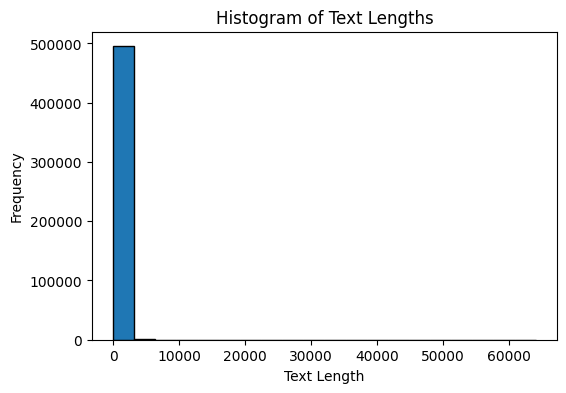

In [118]:
plt.figure(figsize=(6, 4))
plt.hist(df_parsed['word_count'], bins=20, edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [119]:
df_parsed[df_parsed['word_count'] <= 2000].shape

(492269, 9)

In [120]:
df_parsed = df_parsed[df_parsed['word_count'] <= 2000]

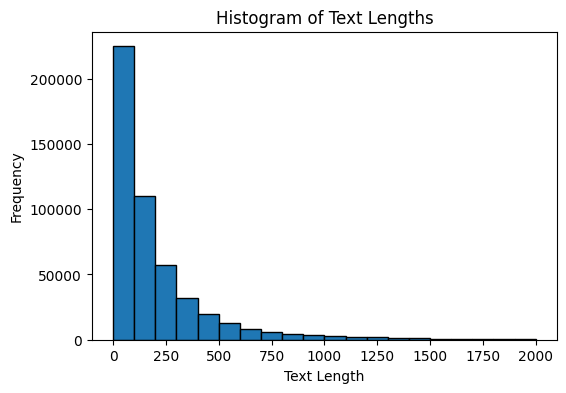

In [121]:
plt.figure(figsize=(6, 4))
plt.hist(df_parsed['word_count'], bins=20, edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## Sample a dataset based on different aspects

In [122]:
df_parsed.sample(5)

,text,email_type,Date,From,To,Subject,Body,recipients_count,word_count
438319,"Date: Tue, 15 May 2001 02:10:00 -0700 (PDT)\nF...",sent,"Tue, 15 May 2001 02:10:00 -0700 (PDT)",charles.yeung@enron.com,"kevin.presto@enron.com, lloyd.will@enron.com",NERC Releases its 2001 Summer Reliability Asse...,"Cc: james.steffes@enron.com, richard.shapiro@e...",2,894
376230,"Date: Wed, 29 Nov 2000 01:28:00 -0800 (PST)\nF...",sent,"Wed, 29 Nov 2000 01:28:00 -0800 (PST)",fool@motleyfool.com,benjamin.rogers@enron.com,Breakfast With The Fool: ADC's Solid Q4,______________________________________________...,1,978
433520,"Date: Wed, 3 Jan 2001 06:13:00 -0800 (PST)\nFr...",sent,"Wed, 3 Jan 2001 06:13:00 -0800 (PST)",jeffrey.shankman@enron.com,gary.hickerson@enron.com,,What do you think of this:\nAs mentioned durin...,1,113
198278,"Date: Mon, 14 May 2001 07:18:00 -0700 (PDT)\nF...",sent,"Mon, 14 May 2001 07:18:00 -0700 (PDT)",tana.jones@enron.com,"alan.aronowitz@enron.com, jeffrey.hodge@enron....",EOL Approvals: 05-11-01 (Re-send),----- Forwarded by Tana Jones/HOU/ECT on 05/14...,2,113
338961,"Date: Sat, 26 Jan 2002 03:54:57 -0800 (PST)\nF...",sent,"Sat, 26 Jan 2002 03:54:57 -0800 (PST)",edirectnetwork@optin-offers.net,pmims@enron.com,Reverse Aging While Burning Fat! 100% Guaranteed!,-____OFFERMAIL_BOUNDARY____\n*****************...,1,774


In [123]:
df_parsed.dtypes

text                object
email_type          object
Date                object
From                object
To                  object
Subject             object
Body                object
recipients_count     int64
word_count           int64
dtype: object

In [126]:
# Create bins for word_count
bins = list(range(0, 2050, 50))  # bins from 0 to 2000 with step 50
labels = range(len(bins)-1)  # label each bin from 0 to len(bins)-2

# Assign bins to each row based on word_count
df_parsed['bin'] = pd.cut(df_parsed['word_count'], bins=bins, labels=labels, include_lowest=True)

# Sample 100 emails from each bin
sampled_dfs = []
for label in labels:
    sampled_df = df_parsed[df_parsed['bin'] == label].sample(n=200, random_state=42)  # adjust random_state for reproducibility
    sampled_dfs.append(sampled_df)

# Concatenate sampled dataframes into one
sampled_df_final = pd.concat(sampled_dfs, ignore_index=True)

# Drop the 'bin' column if you no longer need it
sampled_df_final = sampled_df_final.drop(columns=['bin'])

# Reset index if needed
sampled_df_final = sampled_df_final.reset_index(drop=True)


In [127]:
sampled_df_final.shape

(8000, 9)

In [128]:
sampled_df_final.sample(5)

,text,email_type,Date,From,To,Subject,Body,recipients_count,word_count
4333,"Date: Mon, 8 May 2000 03:32:00 -0700 (PDT)\nFr...",sent,"Mon, 8 May 2000 03:32:00 -0700 (PDT)",mark.taylor@enron.com,tana.jones@enron.com,RE: EnronOnline in Japan,Here is the Japanese repsonse which also conta...,1,1088
1384,"Date: Wed, 20 Dec 2000 01:49:00 -0800 (PST)\nF...",response,"Wed, 20 Dec 2000 01:49:00 -0800 (PST)",rob.gay@enron.com,peter.weidler@enron.com,Re: Cuiaba Project,Those dates are fine for me. Copies of the do...,1,305
4014,"Date: Wed, 20 Feb 2002 14:56:37 -0800 (PST)\nF...",sent,"Wed, 20 Feb 2002 14:56:37 -0800 (PST)",aairmail@info.aa.com,sscott5@enron.com,American Airlines AAirmail,"Dear Susan Scott, \nWelcome to the latest edit...",1,1006
2991,"Date: Tue, 28 Nov 2000 10:18:00 -0800 (PST)\nF...",response,"Tue, 28 Nov 2000 10:18:00 -0800 (PST)",sally.beck@enron.com,mike.jordan@enron.com,Re: Cross calibration for Operations people gl...,I think that it is a great idea to compare rec...,1,722
1937,"Date: Thu, 24 Aug 2000 10:25:00 -0700 (PDT)\nF...",sent,"Thu, 24 Aug 2000 10:25:00 -0700 (PDT)",kevin.hyatt@enron.com,bullets@enron.com,Bullets 8/25,El Paso Field Services - EPFS has agreed to go...,1,465


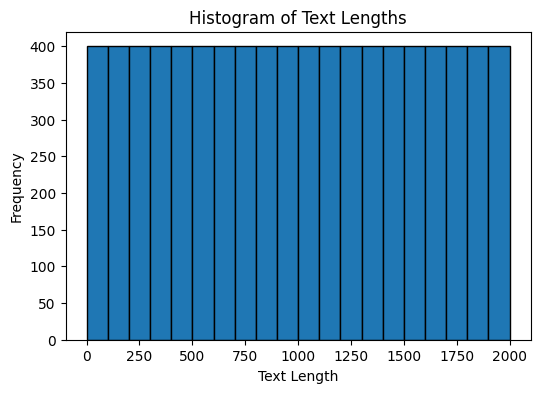

In [129]:
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_final['word_count'], bins=20, edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [130]:
sampled_df_final["email_type"].value_counts()

email_type
sent        6350
response    1650
Name: count, dtype: int64

In [131]:
resp = sampled_df_final[sampled_df_final["email_type"] == "response"]
sent = sampled_df_final[sampled_df_final["email_type"] == "sent"].sample(4000 - len(resp), random_state=42)
sampled_df_4k = pd.concat([resp, sent], ignore_index=True)


In [132]:
sampled_df_4k.shape

(4000, 9)

In [134]:
sampled_df_4k["email_type"].value_counts()

email_type
sent        2350
response    1650
Name: count, dtype: int64

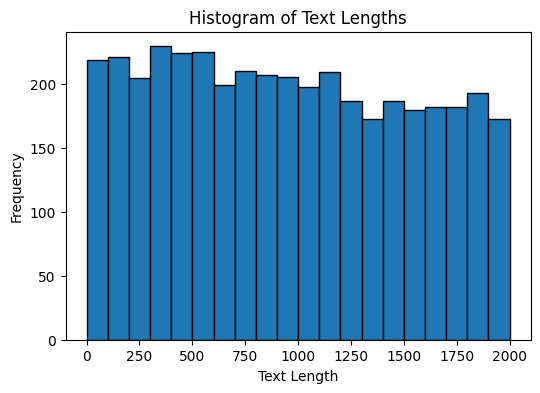

In [135]:
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_4k['word_count'], bins=20, edgecolor='black')
plt.title('Histogram of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [138]:
(sampled_df_4k[sampled_df_4k['Subject'] == ""].shape[0]/ len(sampled_df_4k))*100

1.6500000000000001

#### Now we have a dataset of size 4000 which somewhat has similar representation of the original 500k dataset in terms of word count, subject. 
#### Also, just to understand what goes on in sent vs response messages, i have tried to increase the % of response emails in our sampled dataset compared to original one.

In [143]:
sampled_df_4k.columns

Index(['text', 'email_type', 'Date', 'From', 'To', 'Subject', 'Body',
       'recipients_count', 'word_count'],
      dtype='object')

In [142]:
sampled_df_4k.head()

,text,email_type,Date,From,To,Subject,Body,recipients_count,word_count
0,"Date: Fri, 12 Jan 2001 09:00:00 -0800 (PST)\nF...",response,"Fri, 12 Jan 2001 09:00:00 -0800 (PST)",errol.mclaughlin@enron.com,gregory.carraway@enron.com,Re: Gas Daily deals in dispute,"Greg,\nSherry Dawson took care of these deals ...",1,13
1,"Date: Thu, 30 Sep 1999 03:20:00 -0700 (PDT)\nF...",response,"Thu, 30 Sep 1999 03:20:00 -0700 (PDT)",sara.shackleton@enron.com,taffy.milligan@enron.com,Re: SWAP Group - October and November Calendars,"Taffy - my last name is spelled ""Shackleton"". ...",1,10
2,"Date: Mon, 11 Dec 2000 01:31:00 -0800 (PST)\nF...",response,"Mon, 11 Dec 2000 01:31:00 -0800 (PST)",benjamin.rogers@enron.com,michaela.jim@worldnet.att.net,Re: pictures,Thanks for the pics. Very cute!!!\nBen,1,7
3,"Date: Fri, 7 Jul 2000 06:56:00 -0700 (PDT)\nFr...",response,"Fri, 7 Jul 2000 06:56:00 -0700 (PDT)",phillip.allen@enron.com,gary.taylor@enron.com,Re: market intelligence,"gary,\n thanks for the info.",1,5
4,"Date: Mon, 9 Apr 2001 11:12:00 -0700 (PDT)\nFr...",response,"Mon, 9 Apr 2001 11:12:00 -0700 (PDT)",barry.tycholiz@enron.com,judy.l.wood@ca.pwcglobal.com,"Re: Organizer, etc",I have completed the organizer... I have also ...,1,27


In [144]:
data = sampled_df_4k.to_dict(orient='records')

In [145]:
data[0]

{'text': 'Date: Fri, 12 Jan 2001 09:00:00 -0800 (PST)\nFrom: errol.mclaughlin@enron.com\nTo: gregory.carraway@enron.com\nSubject: Re: Gas Daily deals in dispute\nBody: \nGreg,\nSherry Dawson took care of these deals today.\nThanks,\nErrol McLaughlin, X5-8274',
 'email_type': 'response',
 'Date': 'Fri, 12 Jan 2001 09:00:00 -0800 (PST)',
 'From': 'errol.mclaughlin@enron.com',
 'To': 'gregory.carraway@enron.com',
 'Subject': 'Re: Gas Daily deals in dispute',
 'Body': 'Greg,\nSherry Dawson took care of these deals today.\nThanks,\nErrol McLaughlin, X5-8274',
 'recipients_count': 1,
 'word_count': 13}

In [146]:
import json
json_filename = '../datasets/sampled_emails_4k.json'
with open(json_filename, 'w') as json_file:
    json.dump(data, json_file, indent=4)